## Hypothesis Testing 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

In [3]:
# Independent t-test (or 2-sample): scipy.stats.ttest_ind

* Are adults who drink milk taller than adults who dont drink milk?

In [4]:
# One sample t-test: scipy.stats.ttest_1samp

* Is the the price of gas higher in texas or in new mexico?

In [5]:
# Independent t-test (or 2-sample): scipy.stats.ttest_ind

* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [6]:
# ANOVA: scipy.stats.f_oneway

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [7]:
# Office 1
mean1 = 90
std1 = 15
n1 = 40

# Office 2
mean2 = 100
std2 = 20
n2 = 50

alpha = .05

# Perform two-sample t-test
t_score, p_value = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

# Print the results
print("t-score:", t_score)
print("p-value:", p_value)


t-score: -2.6252287036468456
p-value: 0.01020985244923939


In [8]:
alpha = 0.05

if p_value < alpha:
    print("We reject H0 (null hypothesis)")
else:
    print("We fail to reject H0 (null hypothesis)")

We reject H0 (null hypothesis)


### 3. Load the mpg dataset and use it to answer the following questions:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [9]:
from pydataset import data
mpg = data('mpg')

In [10]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [11]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
mpg_1999 = mpg[mpg['year'] == 1999]['hwy']
mpg_2008 = mpg[mpg['year'] == 2008]['hwy']


In [13]:
# Get all values from the 'mpg' column
mpg_1999_avg = mpg[mpg['year'] == 1999]['hwy'].mean()
mpg_2008_avg = mpg[mpg['year'] == 2008]['hwy'].mean()
print(f'mpg_1999_avg: {mpg_1999_avg}')
print(f'mpg_2008_avg: {mpg_2008_avg}')

mpg_1999_avg: 23.427350427350426
mpg_2008_avg: 23.45299145299145


<Axes: >

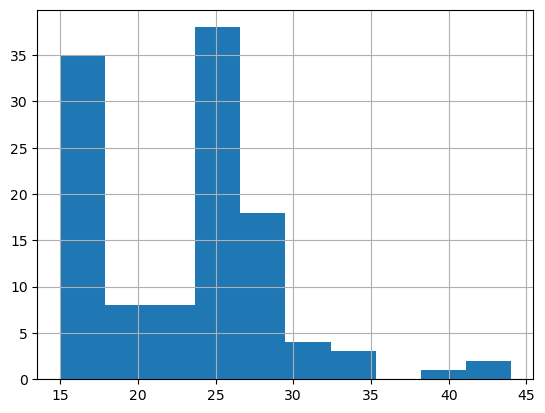

In [14]:
mpg_1999.hist()

<Axes: >

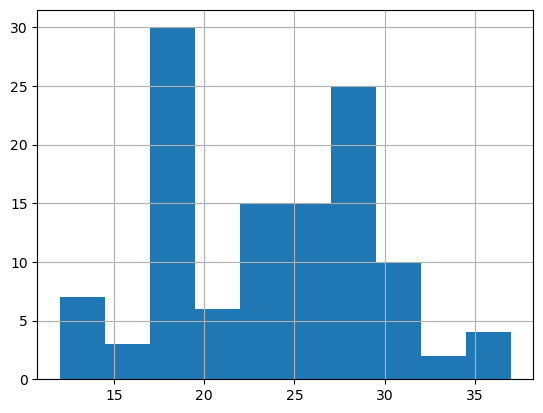

In [15]:
mpg_2008.hist()

In [16]:
t_score, p_value = stats.ttest_ind(mpg_2008, mpg_1999, equal_var=False)

In [17]:
# Is there a significant difference in fuel efficiency between 1999 and 2008
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in fuel efficiency between 2008 and 1999')
else:
    print('There is not a significant difference in fuel efficiency between 2008 and 1999')

There is not a significant difference in fuel efficiency between 2008 and 1999


* Are compact cars more fuel-efficient than the average car?

In [18]:
mpg_compact = mpg[mpg['class'] == 'compact']['hwy']
mpg_average = mpg['hwy']

In [19]:
mpg_compact

1      29
2      29
3      31
4      30
5      26
6      26
7      27
8      26
9      25
10     28
11     27
12     25
13     25
14     25
15     25
142    29
143    27
170    25
171    27
172    25
173    27
187    27
188    29
189    31
190    31
191    26
192    26
193    27
194    30
195    33
196    35
197    37
198    35
208    29
209    26
210    29
211    29
212    24
213    44
214    29
215    26
216    29
217    29
218    29
219    29
220    23
221    24
Name: hwy, dtype: int64

In [20]:
mpg_average

1      29
2      29
3      31
4      30
5      26
       ..
230    28
231    29
232    26
233    26
234    26
Name: hwy, Length: 234, dtype: int64

In [21]:
# Get all values from the 'mpg' column
mpg_compact_avg = mpg[mpg['class'] == 'compact']['hwy'].mean()
mpg_average_avg = mpg['hwy'].mean()
print(f'mpg_compact_avg: {mpg_compact_avg}')
print(f'mpg_average_avg: {mpg_average_avg}')

mpg_compact_avg: 28.29787234042553
mpg_average_avg: 23.44017094017094


<Axes: >

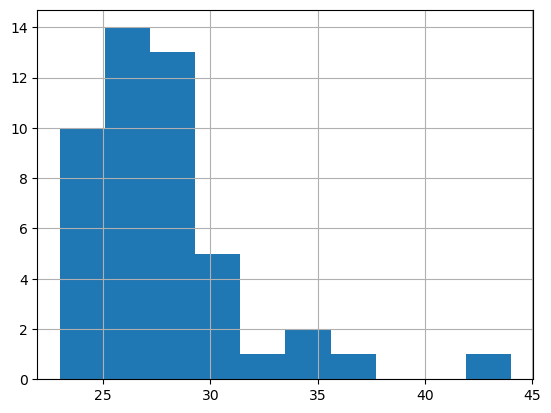

In [22]:
mpg_compact.hist()

In [23]:
t_score, p_value = stats.ttest_1samp(mpg_compact, mpg_average_avg)

# # Print the results
print("t-score:", t_score)
print("p-value:", p_value)


t-score: 8.806470666529446
p-value: 1.9716962312410974e-11


In [24]:
# Is there a significant difference in fuel efficiency between 1999 and 2008
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in fuel efficiency between compact class and average class')
else:
    print('There is not a significant difference in fuel efficiency between compact class and average class')

There is a significant difference in fuel efficiency between compact class and average class


* Do manual cars get better gas mileage than automatic cars?

In [25]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [26]:
mpg_auto = mpg[mpg['trans'] == 'auto']['hwy']
mpg_trans = mpg[mpg['trans'] == 'manual']['hwy']


In [27]:
mpg_auto_avg = mpg[mpg['trans'] == 'auto']['hwy']
mpg_trans_avg = mpg[mpg['trans'] == 'manual']['hwy']
print(f'mpg_compact_avg: {mpg_auto_avg}')
print(f'mpg_average_avg: {mpg_trans_avg}')

mpg_compact_avg: Series([], Name: hwy, dtype: int64)
mpg_average_avg: Series([], Name: hwy, dtype: int64)


In [28]:
mpg_auto.hist()b

SyntaxError: invalid syntax (3777637936.py, line 1)

In [ ]:
mpg_trans.hist()

## Exercises Correlation 
Continue working in your hypothesis_testing notebook.

1. Answer with the type of stats test you would use (assume normal distribution):
* Is there a relationship between the length of your arm and the length of your foot?

In [ ]:
# Independent t-test (or 2-sample): scipy.stats.ttest_ind

* Do guys and gals quit their jobs at the same rate?

In [ ]:
# chi^2 

* Does the length of time of the lecture correlate with a students grade?

In [ ]:
# pearsonr test for correlation 

2. Use the telco_churn data.

In [29]:
from env import user, password, hostname 
def get_db_url (user, password, hostname, db_name):    
    return (f'mysql+pymysql://{user}:{password}@{hostname}/telco_churn')

db_url = get_db_url(user, password, hostname,'telco_churn')
df = pd.read_sql('SELECT * FROM customers', db_url)

In [30]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [31]:
df.shape

(7043, 21)

In [112]:
df.head().T  

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
internet_service_type_id,1,1,2,2,2
online_security,No,No,No,No,No


* Does tenure correlate with monthly charges?

In [44]:
import numpy as np

x = df.tenure
y = df.monthly_charges
n = df.shape[0]

def stdev_month(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return np.sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev_month(x) * stdev_month(y))
r_xy


0.24789985628615005

In [113]:
corr, p =stats.pearsonr(df.tenure, df.monthly_charges)

if p_value < alpha:
    print("We reject H0 (null hypothesis)")
else:
    print("We fail to reject H0 (null hypothesis)")
    

We reject H0 (null hypothesis)


In [115]:
corr, p

(0.2468617666408956, 3.9898213232510553e-98)

* Total charges?

In [58]:
# df = df[df.total_charges.str.strip() == ""]
# df.total_charges.str.replace(' ','').astype(float)
# df.total_charges.dtype

df= df[df.total_charges != " "]
df_tot = df.total_charges.astype(float)


In [116]:
x = df.tenure
y = df_tot


def stdev_total(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return np.sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev_total(x) * stdev_total(y))
r_xy

0.8258804609332019

In [118]:
corr, p =stats.pearsonr(df.tenure, df_tot)

if p_value < alpha:
    print("We reject H0 (null hypothesis)")
else:
    print("We fail to reject H0 (null hypothesis)")
corr, p

We reject H0 (null hypothesis)


(0.8258804609332071, 0.0)

* What happens if you control for phone and internet service?

In [66]:
df['phone_bi'] = np.where(df.phone == 'Yes', '1', '0')


AttributeError: 'DataFrame' object has no attribute 'phone'

In [ ]:
x = df.tenure
y = df_tot


def stdev_total(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return np.sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev_total(x) * stdev_total(y))
r_xy

3. Use the employees database.

In [83]:
#### from env import user, password, hostname

def get_db_url(user, password, hostname, db_name):
    return f'mysql+pymysql://{user}:{password}@{hostname}/{db_name}'

db_url = get_db_url(user, password, hostname, 'employees')
df_emp = pd.read_sql('SELECT * FROM employees', db_url)
df_sal = pd.read_sql('SELECT * FROM salaries', db_url)

In [98]:
df_sal.columns

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

In [96]:
df_emp.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [84]:
df_sal.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [89]:
df_merge = pd.merge(df_emp, df_sal, on='emp_no')
df_merge.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25


In [91]:
df_merge = df_merge.drop_duplicates()
df_merge.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25


In [102]:
df_merge.hire_date.dtypes


dtype('O')

* Is there a relationship between how long an employee has been with the company and their salary?

In [110]:
import pandas as pd
# Convert 'from_date' and 'to_date' to datetime format
df_merge['from_date'] = pd.to_datetime(df_merge['from_date'])

In [111]:
df_merge['to_date'] = pd.to_datetime(df_merge['to_date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-01-01 00:00:00 present at position 16

In [109]:
# # Calculate tenure in days
df_merge['tenure_days'] = (df_merge['to_date'] - df_merge['from_date']).dt.days

# # Convert tenure in days to months
# df_merge['tenure_months'] = df_merge['tenure_days'] /30

TypeError: cannot subtract DatetimeArray from ndarray

In [85]:
x = df_emp.hire_date
y = df_emp.salary


def stdev_emp(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return np.sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev_emp(x) * stdev_emp(y))
r_xy

AttributeError: 'DataFrame' object has no attribute 'salary'

* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

4. Use the sleepstudy data.
* Is there a relationship between days and reaction time?